## Step 0: Import Required Libraries

In this step, we import all the necessary Python libraries for data analysis and visualization.

- `pandas` and `numpy` for data manipulation and calculations.
- `matplotlib` and `seaborn` for static visualizations.
- `plotly.express` for interactive visualizations.
- Set a plotting style for better readability.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plotting style and figure size
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


## Step 1: Load Cleaned RBI Digital Payments Dataset

We load the cleaned dataset prepared in Phase 1. This dataset contains daily digital payment statistics across different payment modes such as RTGS, NEFT, NACH, and others, aggregated for various time periods.

This dataset is ready for exploratory data analysis, statistical summaries, and visualizations.


In [3]:
# Load the clean CSV dataset
df = pd.read_csv("rbi_digital_payments_clean.csv")

# Preview the first 5 rows
df.head()


Unnamed: 0        date  rtgs_vol   rtgs_val  neft_vol   neft_val  aeps_vol  \
0           0  2020-06-01      4.85  436996.69    172.11  104275.13      0.44   
1           1  2020-06-02      4.54  361878.87    100.07   65259.02      0.44   
2           2  2020-06-03      4.30  330632.89    100.36   62985.75      0.44   
3           3  2020-06-04      4.35  329072.45     94.66   63148.29      0.45   
4           4  2020-06-05      4.56  365468.95    111.26   68932.72      0.48   

   aeps_val  upi_vol   upi_val  ...  debit_card_at_pos_vol  \
0      7.68   476.97  10413.11  ...                    NaN   
1      7.67   476.78   9951.30  ...                    NaN   
2      7.48   456.26   9622.38  ...                    NaN   
3      7.32   463.05   9639.50  ...                    NaN   
4      7.32   464.79   9539.52  ...                    NaN   

   debit_card_at_pos_val  debit_card_at_e_commerce_vol  \
0                    NaN                           NaN   
1                    NaN                           NaN   
2                    NaN                           NaN   
3                    NaN                           NaN   
4                    NaN                           NaN   

   debit_card_at_e_commerce_val  ppis_card_at_pos_vol  ppis_card_at_pos_val  \
0                           NaN                   NaN                   NaN   
1                           NaN                   NaN                   NaN   
2                           NaN                   NaN                   NaN   
3                           NaN                   NaN                   NaN   
4                           NaN                   NaN                   NaN   

   ppis_card_at_e_commerce_vol  ppis_card_at_e_commerce_val  year  month  
0                          NaN                          NaN  2020      6  
1                          NaN                          NaN  2020      6  
2                          NaN                          NaN  2020      6  
3                          NaN                          NaN  2020      6  
4                          NaN                          NaN  2020      6  

[5 rows x 52 columns]

### Statistical Summary of the Dataset

This section provides an overview of the RBI digital payments dataset.
The structure of the data, presence of missing values, and key descriptive
statistics such as mean, median, minimum, and maximum values are examined.
Statistical summaries are calculated only for numeric variables to ensure
accuracy and avoid computational errors.


In [12]:
# --------------------------------
# Statistical Summary (Corrected)
# --------------------------------

# Dataset structure
df.info()

# Missing values
df.isnull().sum()

# Descriptive statistics (numeric columns only)
df.describe()

# Median for numeric columns only (FIX)
numeric_df = df.select_dtypes(include='number')
numeric_df.median()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             1706 non-null   int64  
 1   date                                   1706 non-null   object 
 2   rtgs_vol                               1706 non-null   float64
 3   rtgs_val                               1706 non-null   float64
 4   neft_vol                               1706 non-null   float64
 5   neft_val                               1706 non-null   float64
 6   aeps_vol                               1706 non-null   float64
 7   aeps_val                               1706 non-null   float64
 8   upi_vol                                1706 non-null   float64
 9   upi_val                                1706 non-null   float64
 10  imps_vol                               1706 non-null   float64
 11  imps

Unnamed: 0                                  852.500
rtgs_vol                                      7.490
rtgs_val                                 467024.575
neft_vol                                    150.425
neft_val                                 100410.525
aeps_vol                                      0.570
aeps_val                                     16.880
upi_vol                                    2280.215
upi_val                                   37306.855
imps_vol                                    146.885
imps_val                                  14617.000
nach_credit_vol                              90.945
nach_credit_val                            4550.255
nach_debit_vol                               24.450
nach_debit_val                             2779.065
netc_vol                                     91.740
netc_val                                    146.290
bbps_vol                                     28.845
bbps_val                                    513.805
cts_vol     

### 3.1 Univariate Analysis

In univariate analysis, we examine each variable independently to understand its distribution and variation.

- For example, we analyze total transactions, value of transactions, and individual payment modes (RTGS, NEFT, NACH, IMPS, UPI, etc.) separately.
- Histograms are used to visualize the distribution of numeric variables such as daily transaction volumes and values.


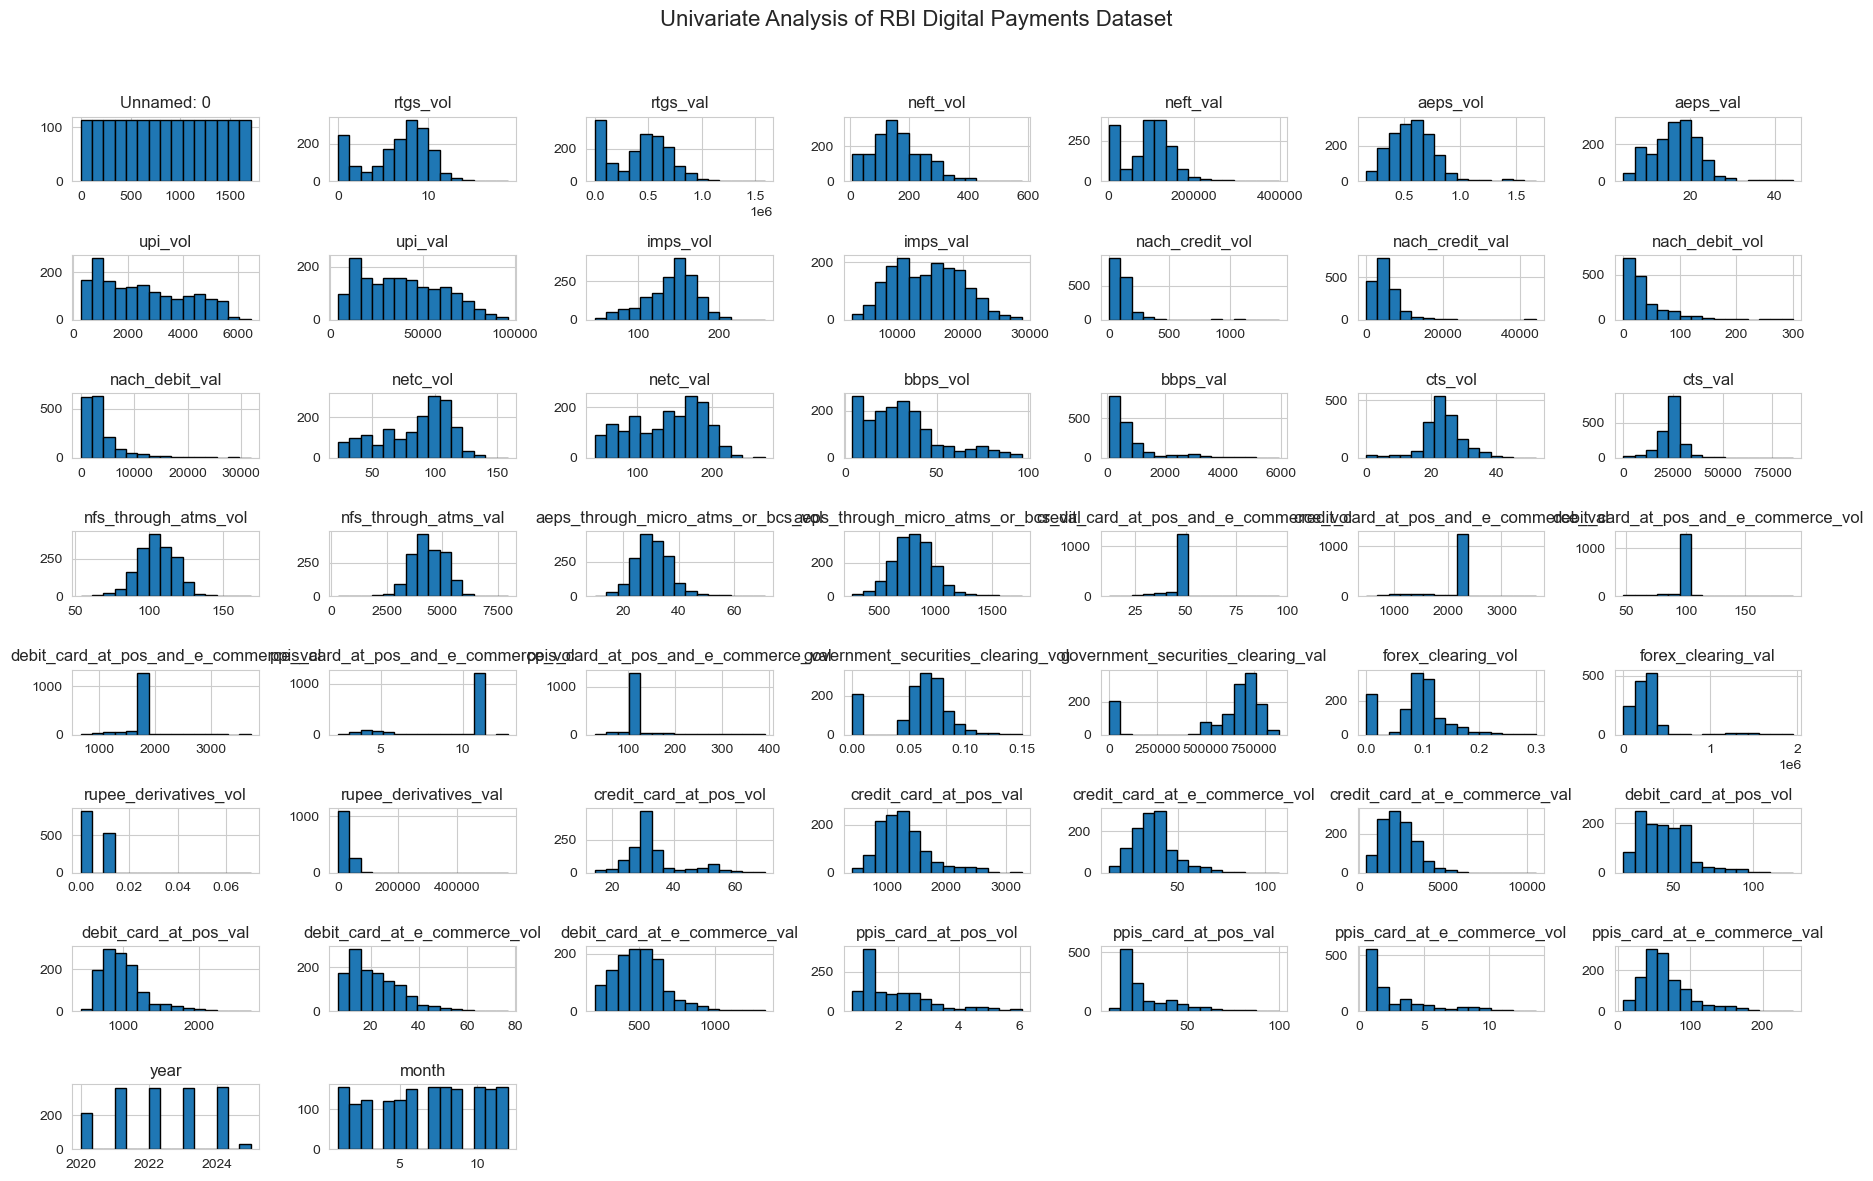

In [13]:
# --------------------------------
# Univariate Analysis (Improved Layout)
# --------------------------------

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot histograms
numeric_df.hist(
    bins=15,
    figsize=(18, 12),
    edgecolor='black'
)

# Improve spacing
plt.suptitle(
    "Univariate Analysis of RBI Digital Payments Dataset",
    fontsize=16
)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


### Bivariate Analysis

Bivariate analysis was conducted to examine relationships between key digital payment modes.
A correlation heatmap was used to visualize overall associations among numeric indicators,
while a scatter plot was employed to study the relationship between NEFT and RTGS transaction volumes.


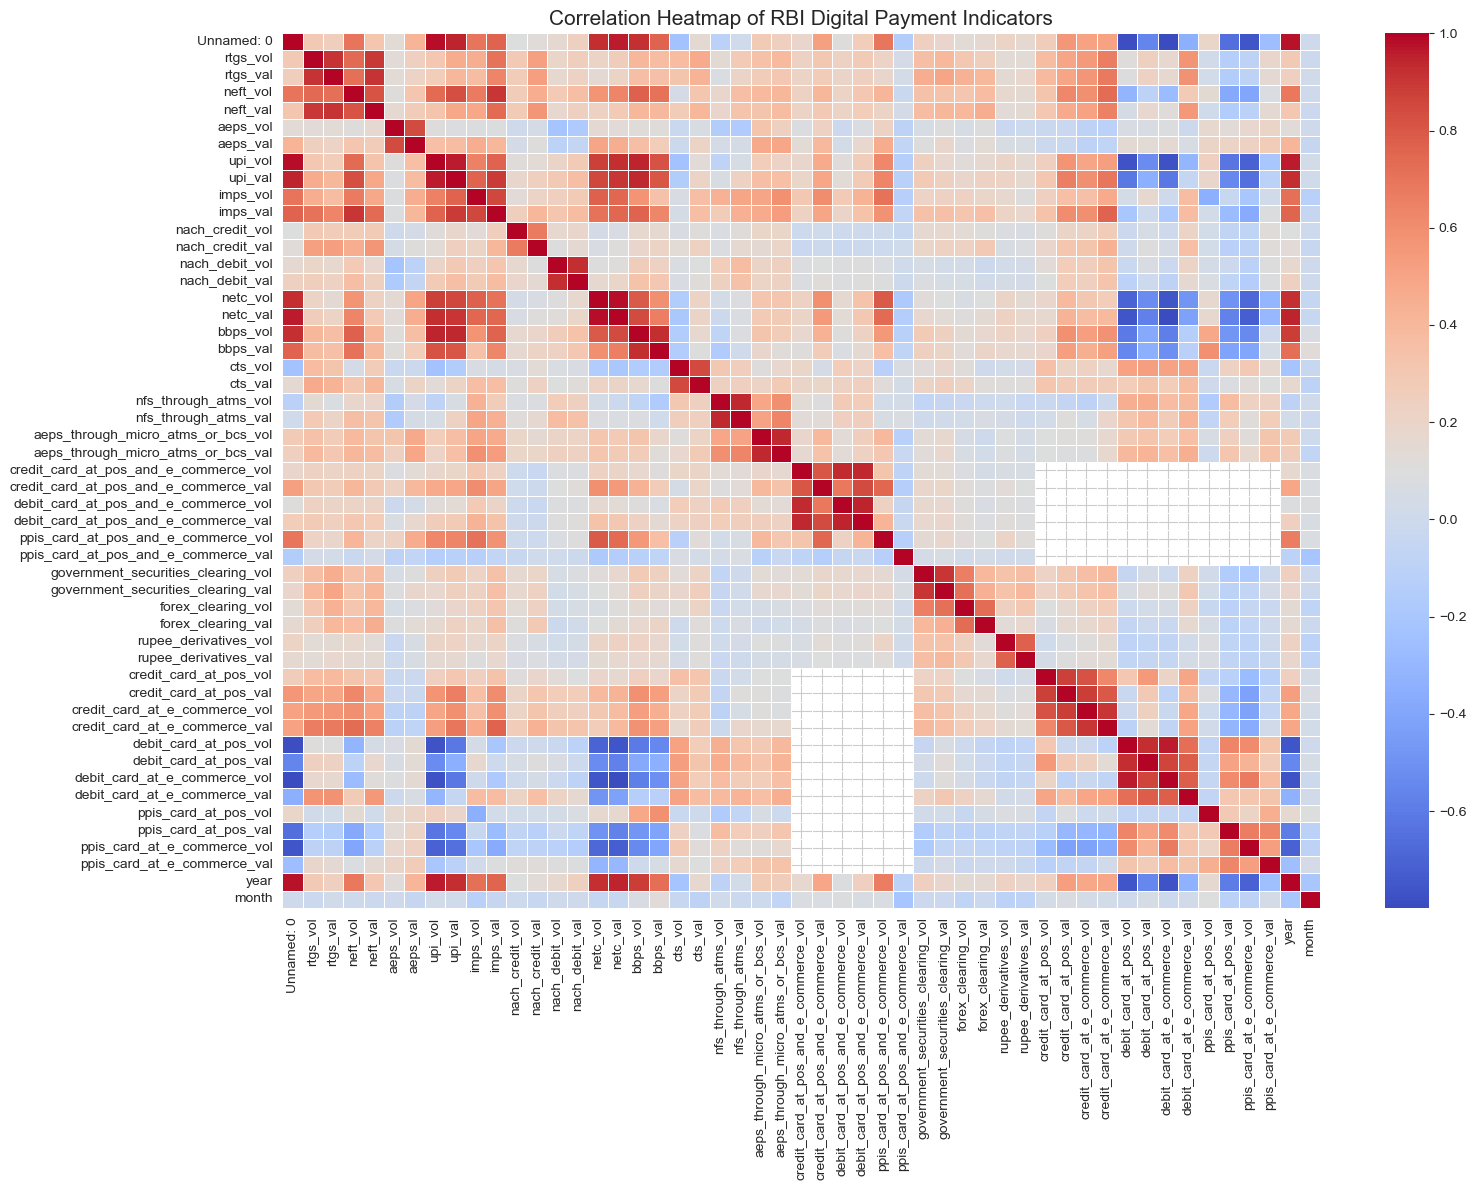

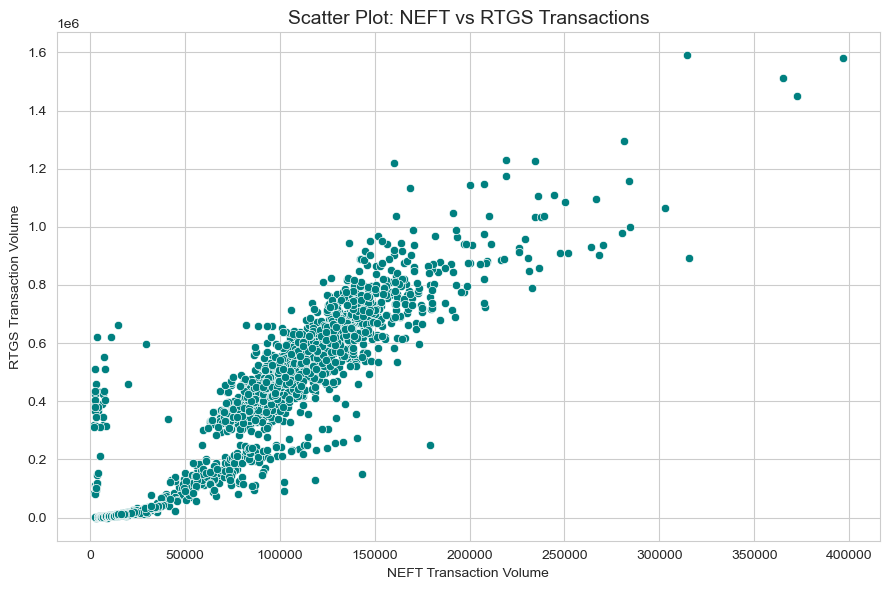

In [15]:
# ===================================
# PHASE 3: BIVARIATE ANALYSIS (SAFE)
# Heatmap (Solution 1) + Scatter Plot
# ===================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# STEP 1: Select numeric columns
# -------------------------------
numeric_df = df.select_dtypes(include='number')

# Check if numeric data exists
if numeric_df.empty:
    print("No numeric columns found in the dataset.")
else:
    # -------------------------------
    # STEP 2: Correlation Heatmap
    # (Solution 1 - Clean & Readable)
    # -------------------------------
    corr = numeric_df.corr()

    plt.figure(figsize=(16, 12))
    sns.heatmap(
        corr,
        cmap="coolwarm",
        annot=False,      # avoids congestion
        linewidths=0.4
    )
    plt.title("Correlation Heatmap of RBI Digital Payment Indicators", fontsize=15)
    plt.tight_layout()
    plt.show()


# -----------------------------------
# STEP 3: Scatter Plot (NEFT vs RTGS)
# -----------------------------------

# Find correct column names safely
neft_col = None
rtgs_col = None

for col in df.columns:
    if "neft" in col.lower():
        neft_col = col
    if "rtgs" in col.lower():
        rtgs_col = col

# Plot only if both columns exist
if neft_col and rtgs_col:
    plt.figure(figsize=(9, 6))
    sns.scatterplot(
        data=df,
        x=neft_col,
        y=rtgs_col,
        color="teal"
    )
    plt.title("Scatter Plot: NEFT vs RTGS Transactions", fontsize=14)
    plt.xlabel("NEFT Transaction Volume")
    plt.ylabel("RTGS Transaction Volume")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("NEFT or RTGS column not found in the dataset.")


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop unwanted index column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract Year for analysis
df['Year'] = df['date'].dt.year

# Select only transaction VOLUME columns
volume_cols = [col for col in df.columns if col.endswith('_vol')]

# Ensure numeric
df[volume_cols] = df[volume_cols].apply(pd.to_numeric, errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1706 non-null   datetime64[ns]
 1   rtgs_vol                               1706 non-null   float64       
 2   rtgs_val                               1706 non-null   float64       
 3   neft_vol                               1706 non-null   float64       
 4   neft_val                               1706 non-null   float64       
 5   aeps_vol                               1706 non-null   float64       
 6   aeps_val                               1706 non-null   float64       
 7   upi_vol                                1706 non-null   float64       
 8   upi_val                                1706 non-null   float64       
 9   imps_vol                               1706 non-null   float64 

### 3.3 Multivariate Analysis

Multivariate analysis examines relationships between multiple digital payment
modes simultaneously. This helps in understanding how various RBI-regulated
payment systems move together over time.


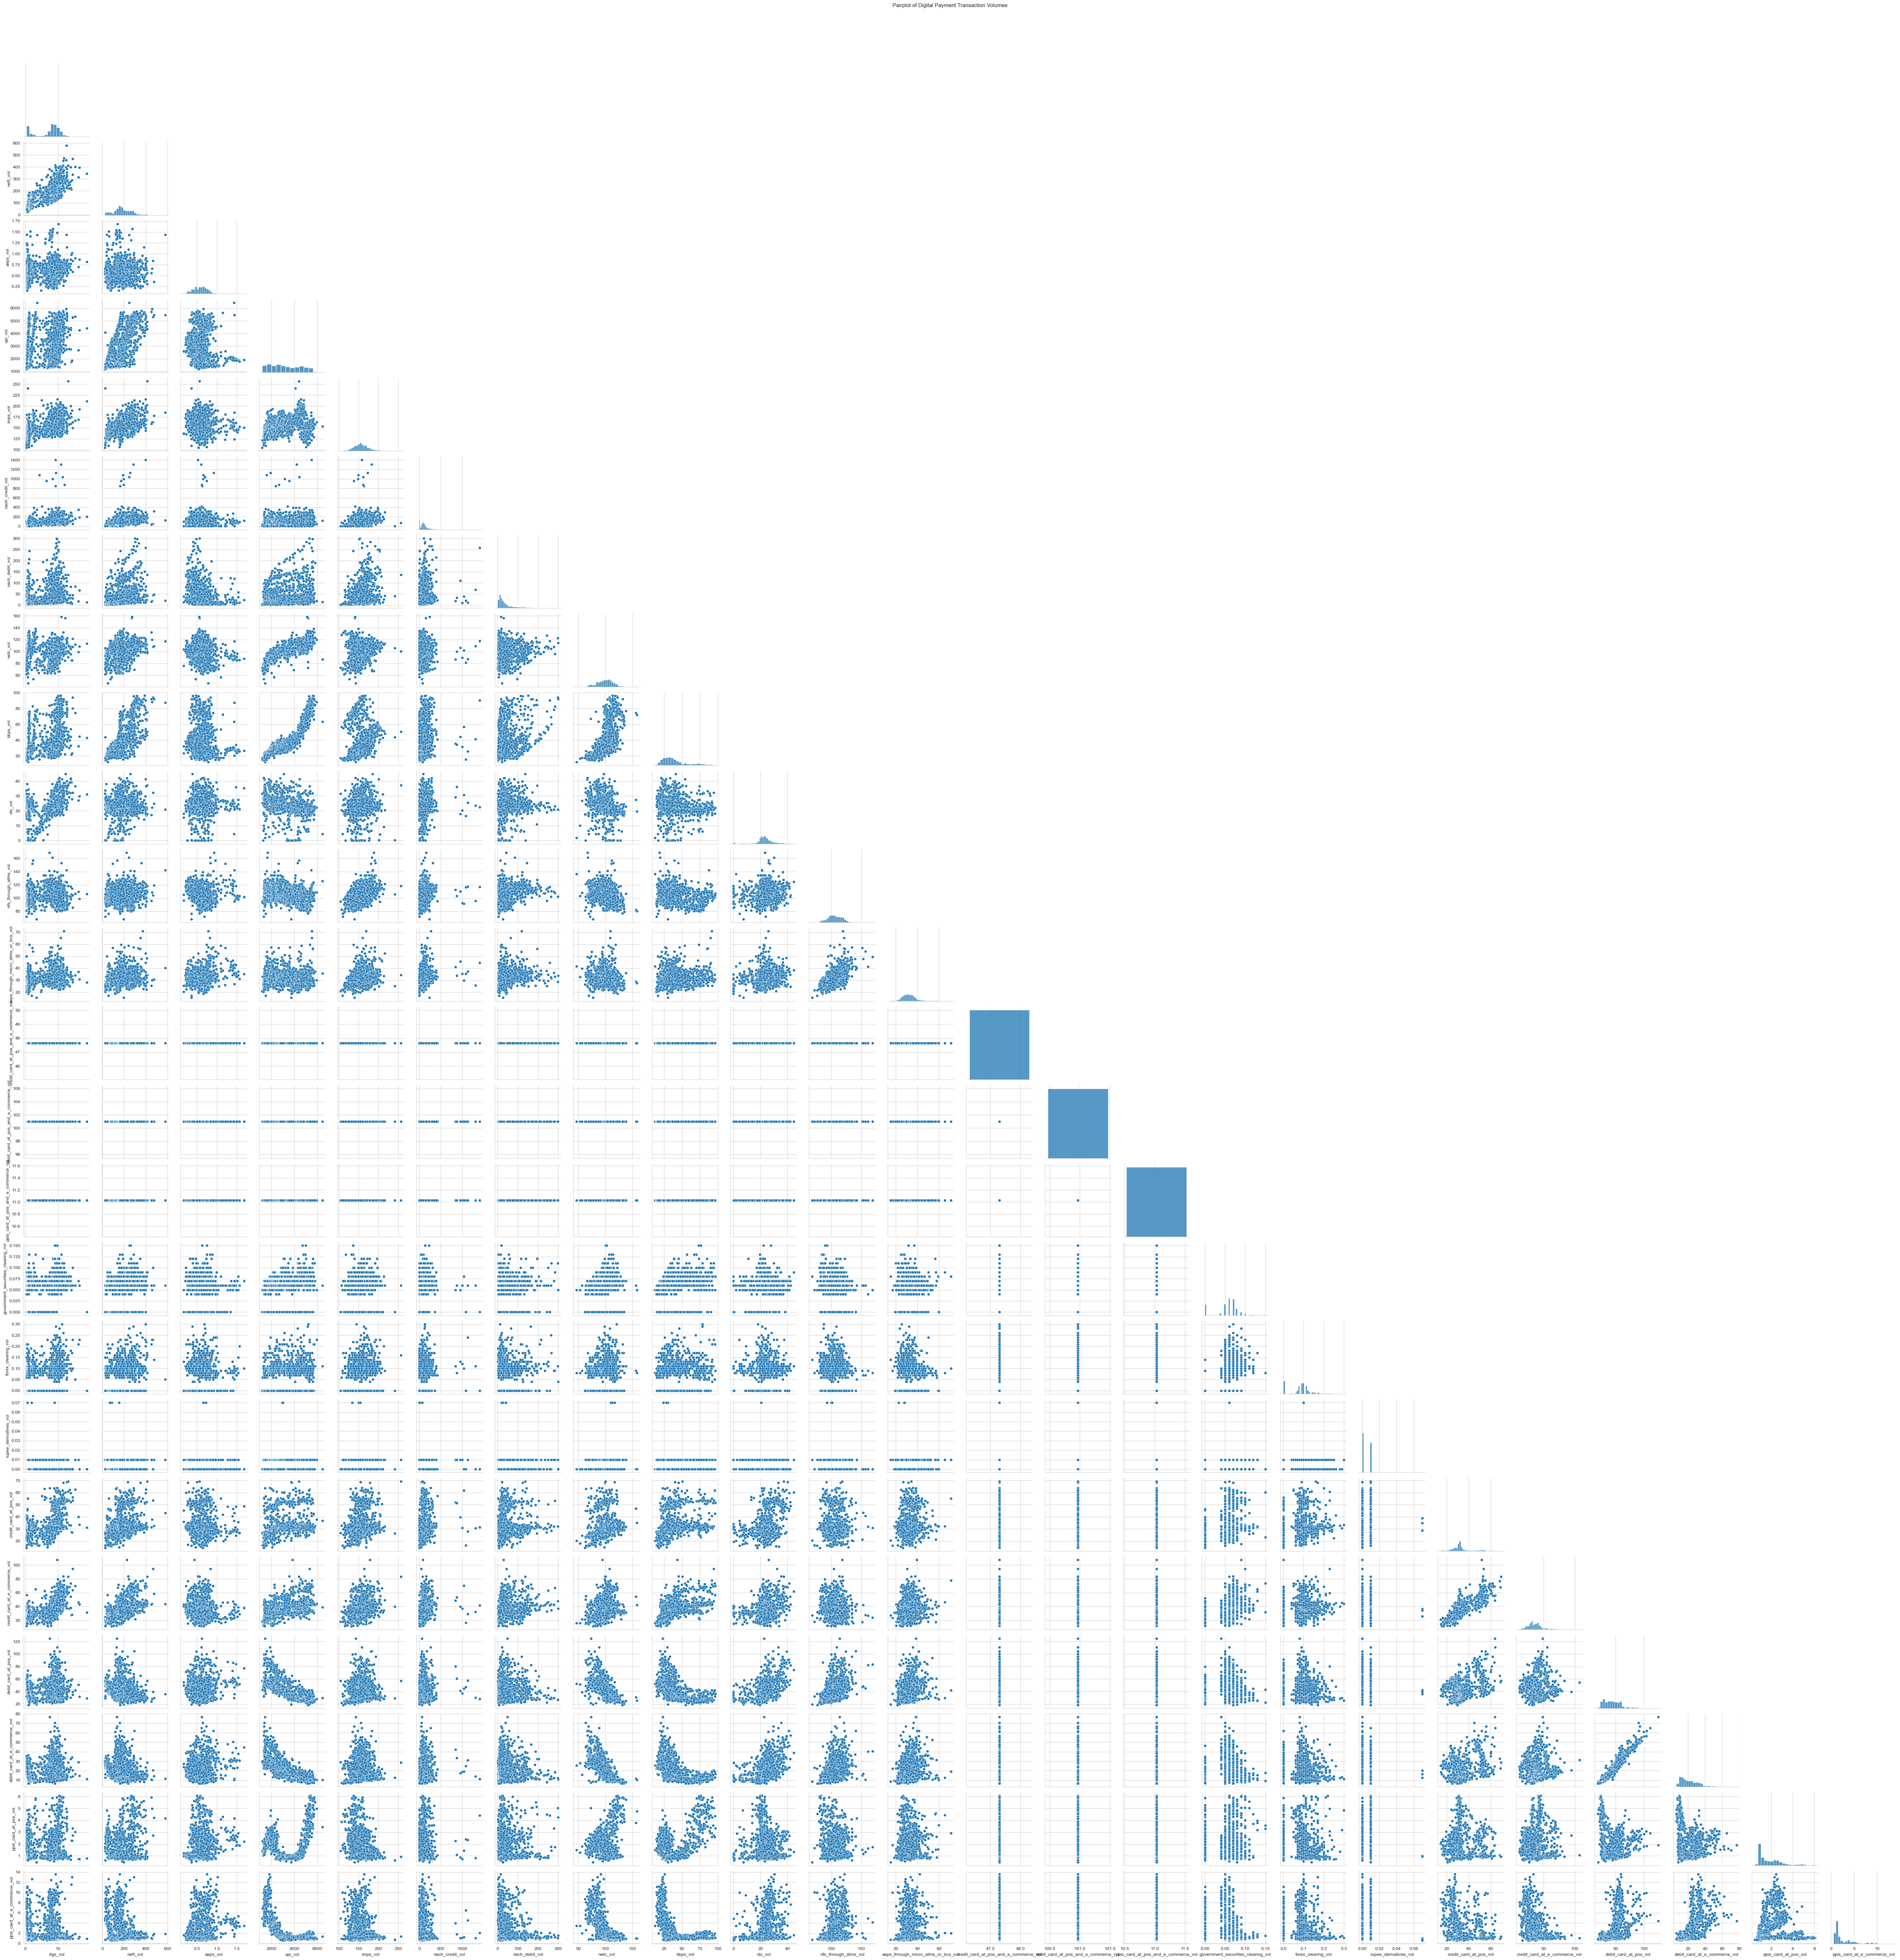

In [19]:
sns.pairplot(
    df[volume_cols].dropna(),
    diag_kind='hist',
    corner=True
)

plt.suptitle("Pairplot of Digital Payment Transaction Volumes", y=1.02)
plt.show()


## Step 4: Groupby and Pivot Table Analysis

Groupby and pivot table techniques summarize transaction volumes across years,
helping to compare growth trends of different digital payment systems.


In [21]:
transactions_per_year = (
    df.groupby('Year')[volume_cols]
    .sum()
    .sort_index()
)

transactions_per_year


rtgs_vol  neft_vol  aeps_vol     upi_vol  imps_vol  nach_credit_vol  \
Year                                                                        
2020   1163.76  18061.32    100.74   127692.87  19605.27         22645.52   
2021   2003.50  38008.83    212.11   387331.41  43380.89         34346.68   
2022   2364.49  49480.22    242.50   740396.89  55869.91         35271.59   
2023   2605.11  65871.24    177.99  1176087.55  58006.51         40153.58   
2024   2952.87  92684.34    239.72  1722080.18  59383.40         48691.93   
2025    268.17   8567.95     16.10   169960.01   4442.23          3567.93   

      nach_debit_vol  netc_vol  bbps_vol  cts_vol  ...  \
Year                                               ...   
2020         7343.22   7611.18   1560.66  5247.22  ...   
2021        11826.23  21977.11   5623.51  9140.89  ...   
2022        12705.61  32466.49   9855.26  9182.54  ...   
2023        15688.06  37423.71  13054.14  8390.64  ...   
2024        19017.42  40593.34  21746.60  7681.35  ...   
2025         1715.83   3803.17   2465.30   639.00  ...   

      ppis_card_at_pos_and_e_commerce_vol  government_securities_clearing_vol  \
Year                                                                            
2020                               246.37                                0.00   
2021                              2440.71                               10.61   
2022                              4025.95                               18.63   
2023                              4025.95                               20.75   
2024                              4036.98                               22.73   
2025                               341.93                                2.05   

      forex_clearing_vol  rupee_derivatives_vol  credit_card_at_pos_vol  \
Year                                                                      
2020                0.00                   0.00                    0.00   
2021               17.49                   0.24                 2554.13   
2022               30.42                   1.41                11270.61   
2023               32.05                   1.97                12992.43   
2024               33.77                   1.72                12915.35   
2025                3.50                   0.24                 1050.70   

      credit_card_at_e_commerce_vol  debit_card_at_pos_vol  \
Year                                                         
2020                           0.00                   0.00   
2021                        2287.79                5773.07   
2022                       11154.31               20776.72   
2023                       14248.22               15606.54   
2024                       15711.38               11142.03   
2025                        1357.91                 790.27   

      debit_card_at_e_commerce_vol  ppis_card_at_pos_vol  \
Year                                                       
2020                          0.00                  0.00   
2021                       3413.24                150.88   
2022                      11153.92                840.60   
2023                       7184.54                348.32   
2024                       4669.43                822.17   
2025                        313.23                161.22   

      ppis_card_at_e_commerce_vol  
Year                               
2020                         0.00  
2021                       599.83  
2022                      1920.04  
2023                       470.13  
2024                       473.78  
2025                        32.96  

[6 rows x 24 columns]

In [22]:
pivot_table = pd.pivot_table(
    df,
    values=volume_cols,
    index='Year',
    aggfunc='sum'
)

pivot_table


aeps_through_micro_atms_or_bcs_vol  aeps_vol  bbps_vol  \
Year                                                           
2020                             5386.63    100.74   1560.66   
2021                            10223.48    212.11   5623.51   
2022                            12455.99    242.50   9855.26   
2023                            12009.09    177.99  13054.14   
2024                            11412.88    239.72  21746.60   
2025                              915.09     16.10   2465.30   

      credit_card_at_e_commerce_vol  credit_card_at_pos_and_e_commerce_vol  \
Year                                                                         
2020                           0.00                                2836.34   
2021                        2287.79                               15748.18   
2022                       11154.31                               17392.25   
2023                       14248.22                               17392.25   
2024                       15711.38                               17439.90   
2025                        1357.91                                1477.15   

      credit_card_at_pos_vol  cts_vol  debit_card_at_e_commerce_vol  \
Year                                                                  
2020                    0.00  5247.22                          0.00   
2021                 2554.13  9140.89                       3413.24   
2022                11270.61  9182.54                      11153.92   
2023                12992.43  8390.64                       7184.54   
2024                12915.35  7681.35                       4669.43   
2025                 1050.70   639.00                        313.23   

      debit_card_at_pos_and_e_commerce_vol  debit_card_at_pos_vol  ...  \
Year                                                               ...   
2020                               6852.43                   0.00  ...   
2021                              34161.15                5773.07  ...   
2022                              36854.05               20776.72  ...   
2023                              36854.05               15606.54  ...   
2024                              36955.02               11142.03  ...   
2025                               3130.07                 790.27  ...   

      nach_debit_vol  neft_vol  netc_vol  nfs_through_atms_vol  \
Year                                                             
2020         7343.22  18061.32   7611.18              22045.82   
2021        11826.23  38008.83  21977.11              38469.32   
2022        12705.61  49480.22  32466.49              40000.74   
2023        15688.06  65871.24  37423.71              39458.10   
2024        19017.42  92684.34  40593.34              36675.95   
2025         1715.83   8567.95   3803.17               2869.56   

      ppis_card_at_e_commerce_vol  ppis_card_at_pos_and_e_commerce_vol  \
Year                                                                     
2020                         0.00                               246.37   
2021                       599.83                              2440.71   
2022                      1920.04                              4025.95   
2023                       470.13                              4025.95   
2024                       473.78                              4036.98   
2025                        32.96                               341.93   

      ppis_card_at_pos_vol  rtgs_vol  rupee_derivatives_vol     upi_vol  
Year                                                                     
2020                  0.00   1163.76                   0.00   127692.87  
2021                150.88   2003.50                   0.24   387331.41  
2022                840.60   2364.49                   1.41   740396.89  
2023                348.32   2605.11                   1.97  1176087.55  
2024                822.17   2952.87                   1.72  1722080.18  
2025                161.22    268.17                   0.24   1699

## Step 5: Correlation Analysis

Correlation analysis identifies relationships between various digital payment
modes and helps determine whether their transaction volumes move together.


In [23]:
corr_matrix = df[volume_cols].corr()
corr_matrix


rtgs_vol  neft_vol  aeps_vol   upi_vol  \
rtgs_vol                               1.000000  0.741443  0.131806  0.309856   
neft_vol                               0.741443  1.000000  0.112480  0.736287   
aeps_vol                               0.131806  0.112480  1.000000  0.108555   
upi_vol                                0.309856  0.736287  0.108555  1.000000   
imps_vol                               0.455589  0.669956  0.088081  0.654220   
nach_credit_vol                        0.292367  0.272414  0.005671  0.119420   
nach_debit_vol                         0.194224  0.288838 -0.217937  0.202540   
netc_vol                               0.210856  0.573653  0.155503  0.878701   
bbps_vol                               0.405933  0.768161  0.118636  0.945067   
cts_vol                                0.377137  0.043532 -0.023078 -0.232776   
nfs_through_atms_vol                   0.148736  0.177950 -0.146668 -0.083759   
aeps_through_micro_atms_or_bcs_vol     0.345301  0.386078  0.318702  0.266247   
credit_card_at_pos_and_e_commerce_vol  0.225964  0.224966  0.083246  0.181363   
debit_card_at_pos_and_e_commerce_vol   0.228655  0.211611 -0.013073  0.125776   
ppis_card_at_pos_and_e_commerce_vol    0.216319  0.416218  0.233332  0.625275   
government_securities_clearing_vol     0.364148  0.344357  0.057364  0.234144   
forex_clearing_vol                     0.308799  0.312323  0.052736  0.123613   
rupee_derivatives_vol                  0.137514  0.168562 -0.026951  0.202905   
credit_card_at_pos_vol                 0.371578  0.319719 -0.019531  0.246434   
credit_card_at_e_commerce_vol          0.549287  0.593789 -0.094375  0.500503   
debit_card_at_pos_vol                  0.108266 -0.320604  0.067901 -0.766348   
debit_card_at_e_commerce_vol           0.171309 -0.276201  0.092075 -0.772755   
ppis_card_at_pos_vol                   0.018303  0.145742  0.169122  0.248067   
ppis_card_at_e_commerce_vol           -0.091571 -0.399687  0.175798 -0.713978   

                                       imps_vol  nach_credit_vol  \
rtgs_vol                               0.455589         0.292367   
neft_vol                               0.669956         0.272414   
aeps_vol                               0.088081         0.005671   
upi_vol                                0.654220         0.119420   
imps_vol                               1.000000         0.133973   
nach_credit_vol                        0.133973         1.000000   
nach_debit_vol                         0.245418         0.164269   
netc_vol                               0.768807         0.038414   
bbps_vol                               0.576687         0.163900   
cts_vol                                0.068529         0.072194   
nfs_through_atms_vol                   0.437512         0.074507   
aeps_through_micro_atms_or_bcs_vol     0.495207         0.196744   
credit_card_at_pos_and_e_commerce_vol  0.303674        -0.002041   
debit_card_at_pos_and_e_commerce_vol   0.287712        -0.004636   
ppis_card_at_pos_and_e_commerce_vol    0.711348         0.003939   
government_securities_clearing_vol     0.215933         0.159099   
forex_clearing_vol                     0.225598         0.137573   
rupee_derivatives_vol                  0.164267         0.086168   
credit_card_at_pos_vol                 0.242089         0.109691   
credit_card_at_e_commerce_vol          0.352758         0.207998   
debit_card_at_pos_vol                  0.036337        -0.014689   
debit_card_at_e_commerce_vol           0.008799         0.007998   
ppis_card_at_pos_vol                  -0.345064         0.024754   
ppis_card_at_e_commerce_vol           -0.200573        -0.080495   

                                       nach_debit_vol  netc_vol  bbps_vol  \
rtgs_vol                                     0.194224  0.210856  0.405933   
neft_vol                                     0.288838  0.573653  0.768161   
aeps_vol                                    -0.217937  0.155503  0.118636   
upi_

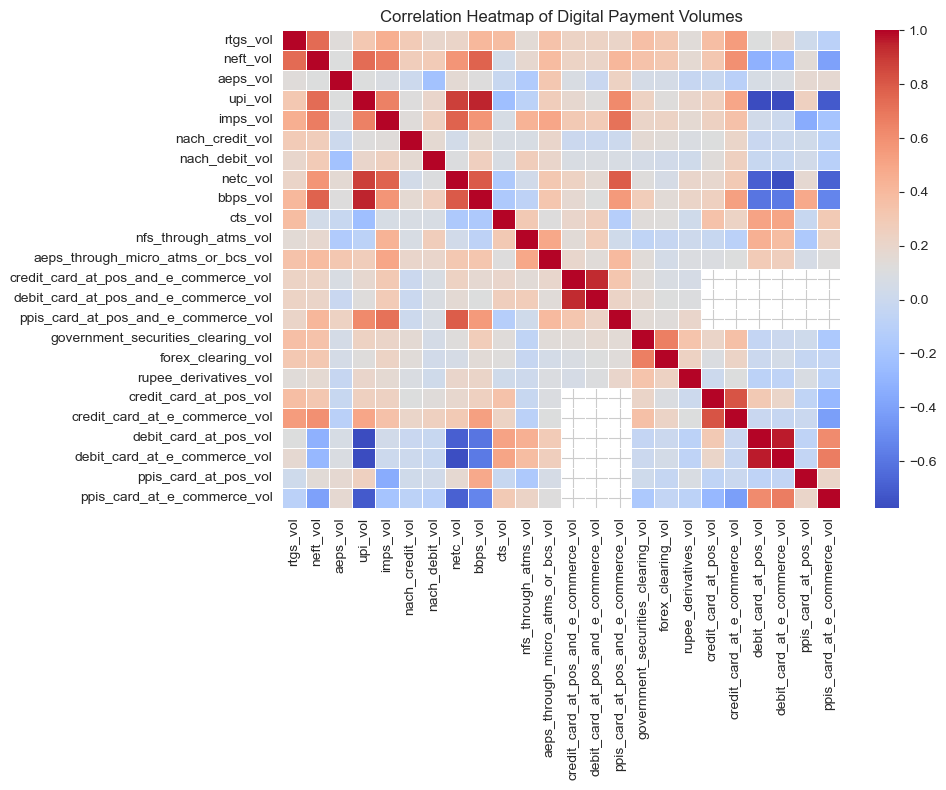

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    linewidths=0.5
)

plt.title("Correlation Heatmap of Digital Payment Volumes")
plt.tight_layout()
plt.show()


### 6.1 Bar Plot

Bar plots compare annual transaction volumes across different digital payment
modes regulated by RBI.


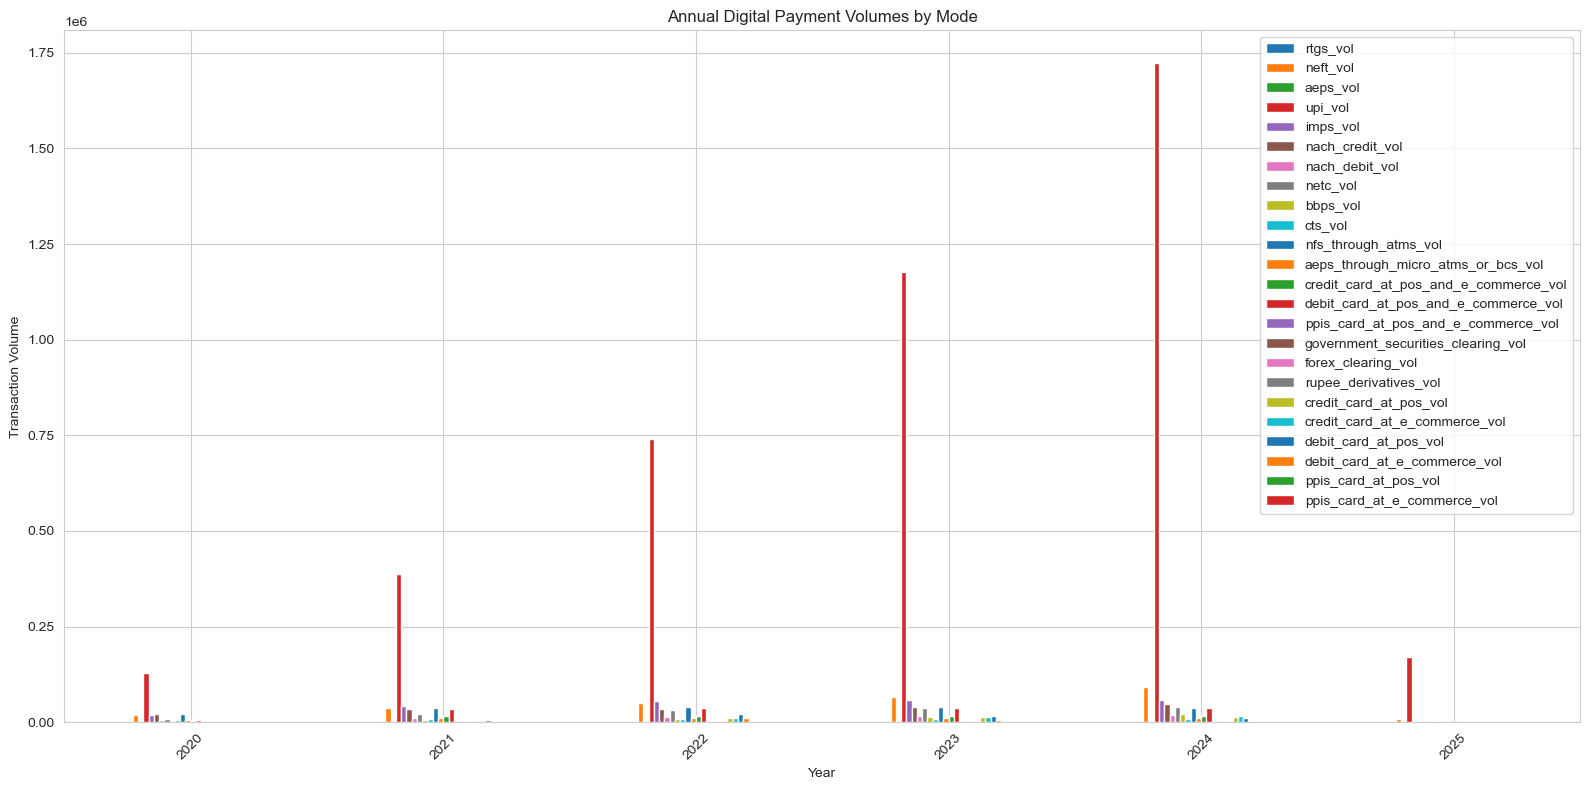

In [25]:
transactions_per_year.plot(
    kind='bar',
    figsize=(16,8)
)

plt.title("Annual Digital Payment Volumes by Mode")
plt.xlabel("Year")
plt.ylabel("Transaction Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 6.2 Line Chart

Line charts depict long-term trends in transaction volumes for major digital
payment systems.


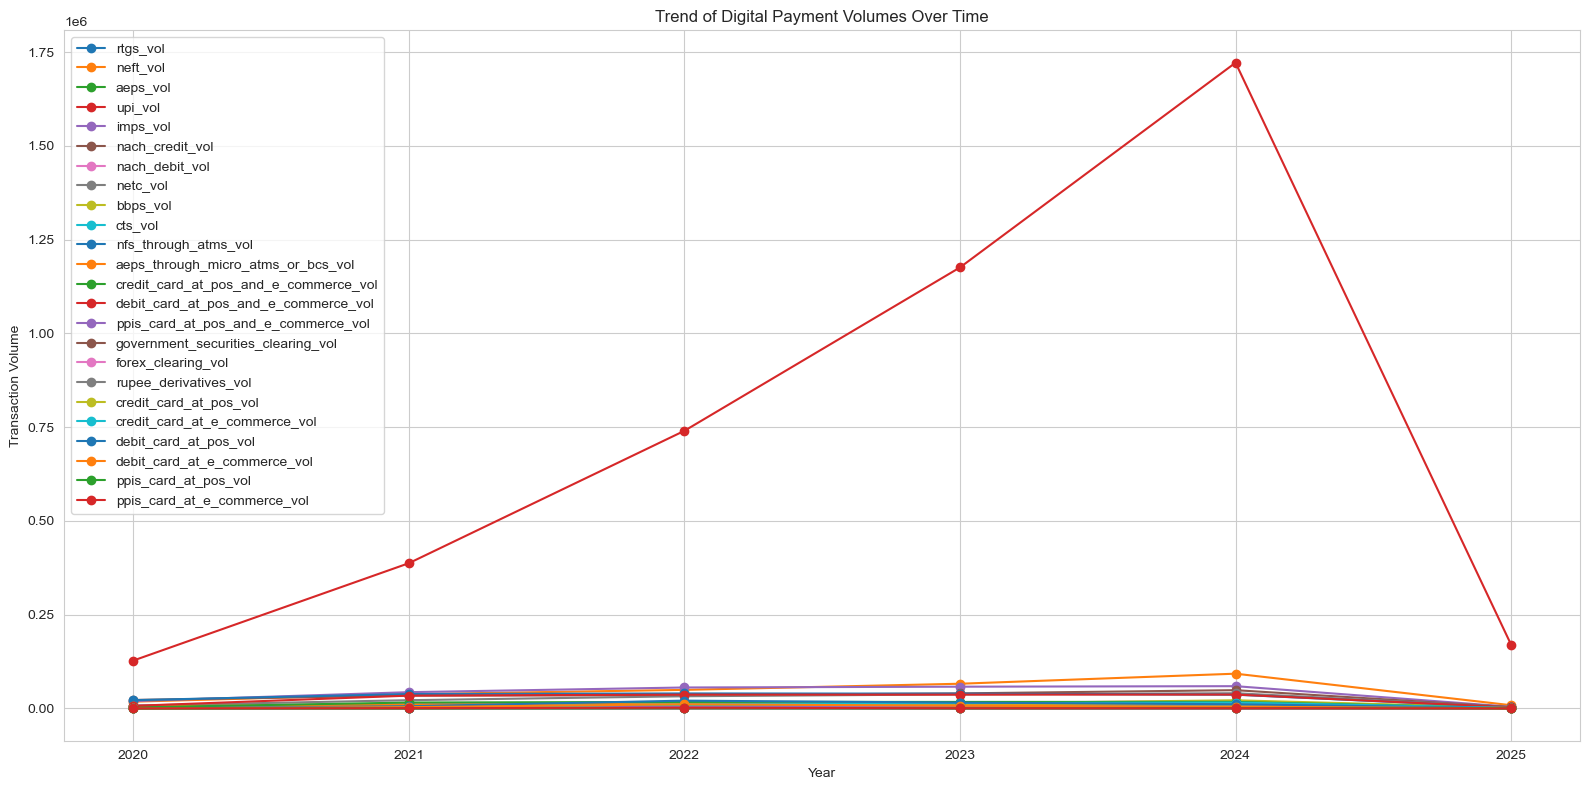

In [26]:
transactions_per_year.plot(
    kind='line',
    figsize=(16,8),
    marker='o'
)

plt.title("Trend of Digital Payment Volumes Over Time")
plt.xlabel("Year")
plt.ylabel("Transaction Volume")
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.3 Pie Chart

Pie charts illustrate the proportional contribution of each payment mode to
overall digital transaction volumes.To improve readability, only the top major digital payment modes are displayed,
while smaller modes are grouped under "Others".


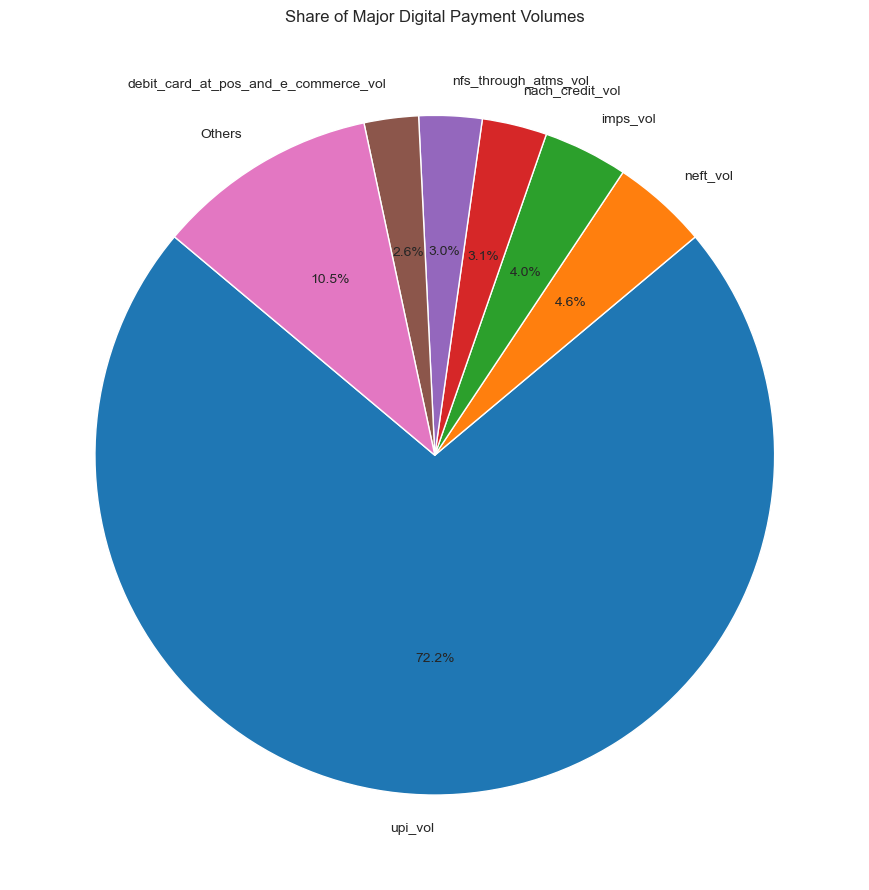

In [28]:
# Sum total volumes
total_volume = df[volume_cols].sum().sort_values(ascending=False)

# Keep top 6 payment modes
top_modes = total_volume[:6]

# Combine remaining into "Others"
others = total_volume[6:].sum()

pie_data = top_modes.copy()
pie_data['Others'] = others

# Plot clean pie chart
plt.figure(figsize=(9,9))
pie_data.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Share of Major Digital Payment Volumes")
plt.ylabel("")
plt.tight_layout()
plt.show()


### 6.4 Box Plot

Box plots highlight the distribution and variability of transaction volumes
across different digital payment modes.


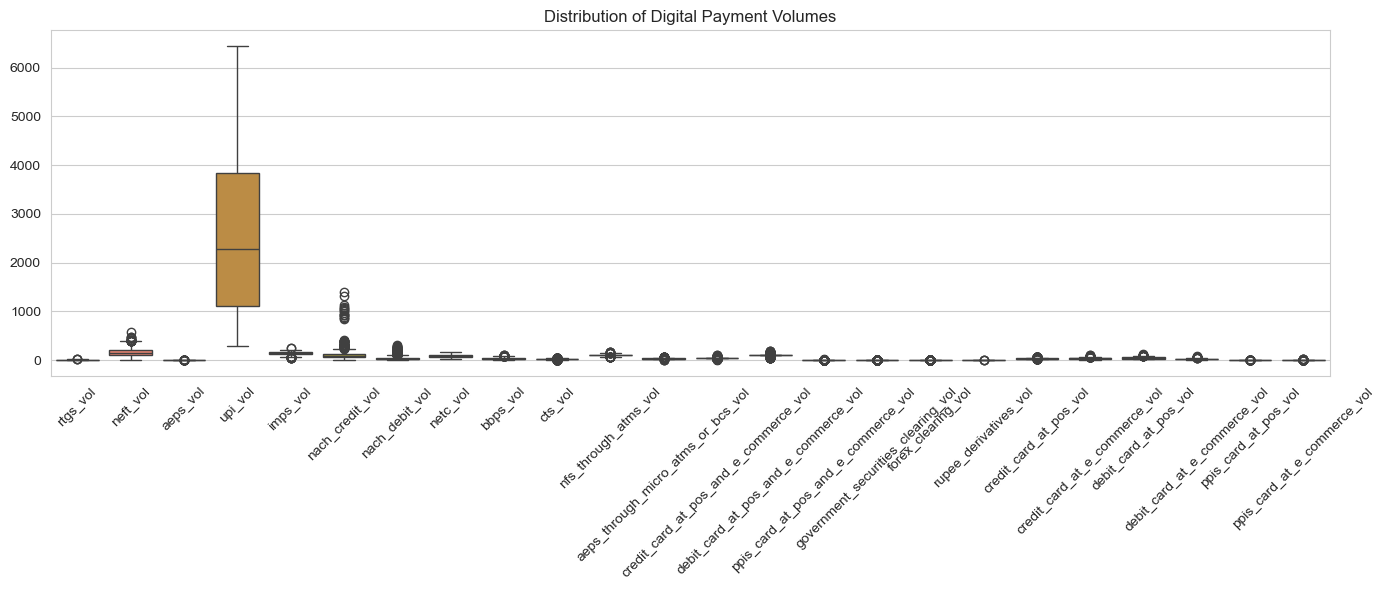

In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[volume_cols])
plt.title("Distribution of Digital Payment Volumes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 6.5 Scatter Plot

Scatter plots help examine the relationship between two major digital payment
modes.


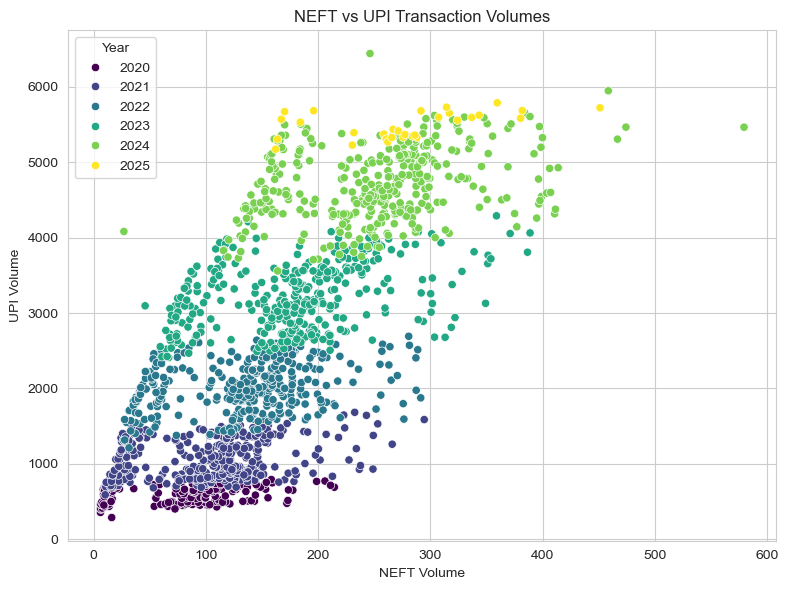

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='neft_vol',
    y='upi_vol',
    hue='Year',
    palette='viridis'
)

plt.title("NEFT vs UPI Transaction Volumes")
plt.xlabel("NEFT Volume")
plt.ylabel("UPI Volume")
plt.tight_layout()
plt.show()


### 6.6 Subplots

Subplots allow multiple visualizations to be displayed together for efficient
comparison of digital payment trends.


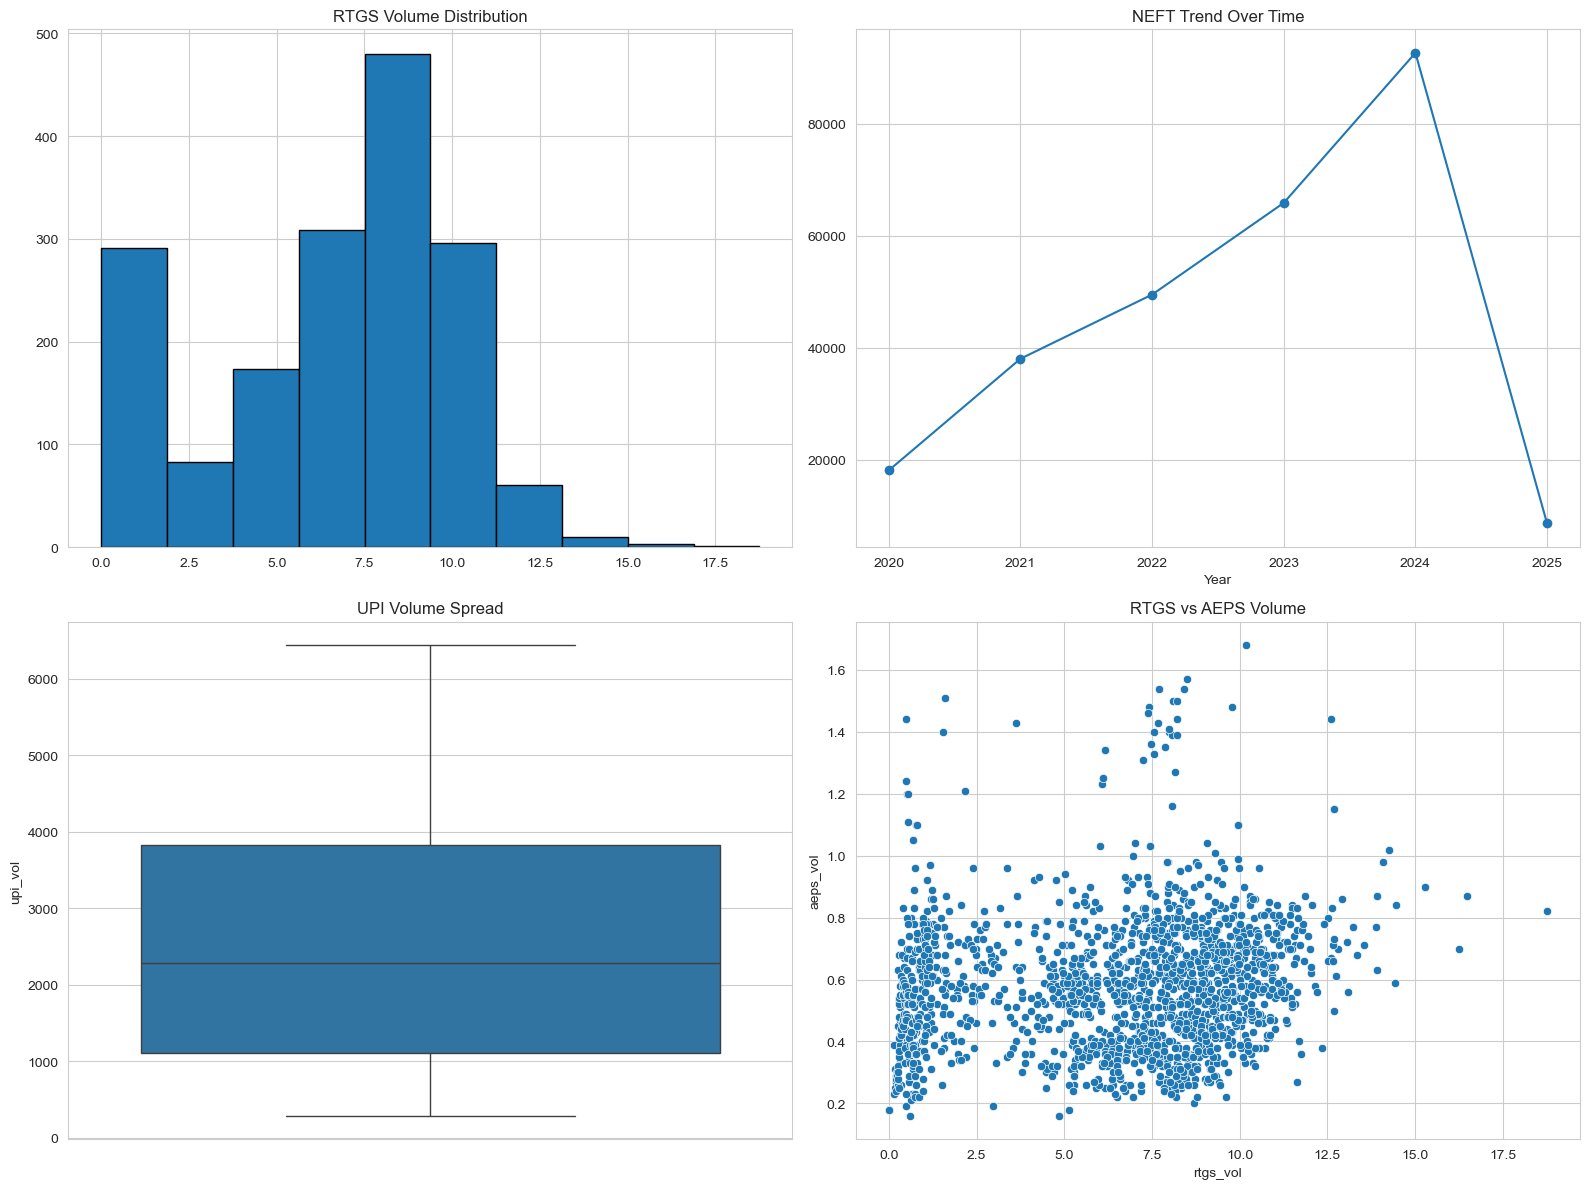

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

df['rtgs_vol'].hist(ax=axes[0,0], edgecolor='black')
axes[0,0].set_title("RTGS Volume Distribution")

transactions_per_year['neft_vol'].plot(ax=axes[0,1], marker='o')
axes[0,1].set_title("NEFT Trend Over Time")

sns.boxplot(y=df['upi_vol'], ax=axes[1,0])
axes[1,0].set_title("UPI Volume Spread")

sns.scatterplot(
    data=df,
    x='rtgs_vol',
    y='aeps_vol',
    ax=axes[1,1]
)
axes[1,1].set_title("RTGS vs AEPS Volume")

plt.tight_layout()
plt.show()
